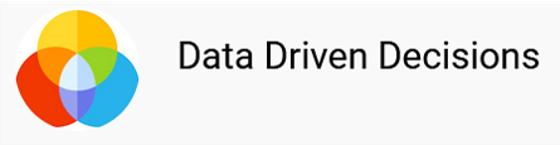<br>
https://www.youtube.com/channel/UCMQ-E2U2-lXmDOTtlw8P2zQ

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  GPU_LIST=`nvidia-smi -L 2> /dev/null`
  if [ "$?" -eq "0" ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

In [ ]:
using BenchmarkTools

M = rand(2048, 2048)
@benchmark M^2

BenchmarkTools.Trial: 11 samples with 1 evaluation.
 Range (min … max):  468.160 ms … 583.248 ms  ┊ GC (min … max): 0.64% … 20.35%
 Time  (median):     480.336 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   488.248 ms ±  33.092 ms  ┊ GC (mean ± σ):  2.72% ±  6.09%

  ██▁   █ █         ▁                                         ▁  
  ███▁▁▁█▁█▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  468 ms           Histogram: frequency by time          583 ms <

 Memory estimate: 32.00 MiB, allocs estimate: 2.

In [ ]:
if ENV["COLAB_GPU"] == "1"
    using CUDA

    M_gpu = cu(M)
    @benchmark CUDA.@sync M_gpu^2
else
    println("No GPU found.")
end

No GPU found.


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

### Arithmetic Operations

In [ ]:
2+3

5

In [ ]:
3-2

1

In [ ]:
# ^ is equivalent to ** in Python
2^3

8

In [ ]:
4%2

0

In [ ]:
5 / 3

1.6666666666666667

In [ ]:
2 * 3

6

### Julia variables

In [ ]:
myIncome = 1000

In [ ]:
my_income = 1000
my_taxrate = .1
my_tax = my_income * my_taxrate
my_tax

100.0

In [ ]:
# We can use different mathematical symbols in Julia as variables
⊗ = 5

5

In [ ]:
⊗

5

In [ ]:
+ᵃ = 2

2

In [ ]:
+ᵃ

2

In [ ]:
Name = 2

2

In [ ]:
+̂ₐ″ = 2

2

In [ ]:
+̂ₐ″

2

In [ ]:
int my_income = 1000

In [ ]:
# type() in Python is typeof() in Julia
typeof(my_income)

Int64

In [ ]:
# inbuilt in Julia
pi

π = 3.1415926535897...

###Julia Strings

In [ ]:
"Hello"

"Hello"

In [ ]:
# in Julia, ' ' can have only single characters in it. " " means it is a string
v = "H"

"H"

In [ ]:
typeof(v)

String

In [ ]:
"I'am Soumya'

LoadError: ignored

In [ ]:
print("Hello")

Hello

In [ ]:
"Hello world one"
"Hello world two"

LoadError: ignored

In [ ]:
# always try to use print() to print something
print("Hello world one")
print("Hello world two")

Hello world oneHello world two

In [ ]:
"Hello \nworld"

"Hello \nworld"

In [ ]:
# \n only works in print()
print("Hello \nworld")

Hello 
world

In [ ]:
"Hello \tworld"

"Hello \tworld"

In [ ]:
# \t only works in print()
print("Hello \tworld")

Hello 	world

In [ ]:
# len() in Python is same as length() in Julia
length("Hello world")

11

### Strings indexing and slicing

In [ ]:
myString = "Hello World"

"Hello World"

In [ ]:
myString[5]

'o': ASCII/Unicode U+006F (category Ll: Letter, lowercase)

In [ ]:
myString[11]

'd': ASCII/Unicode U+0064 (category Ll: Letter, lowercase)

In [ ]:
myString[1:7]

"Hello W"

In [ ]:
myString[end-4]

'W': ASCII/Unicode U+0057 (category Lu: Letter, uppercase)

In [ ]:
reverse(myString)

"dlroW olleH"

### String Properties and Methods

In [ ]:
# item reassignment
name = "Soumyabrata Roy"

"Soumyabrata Roy"

In [ ]:
name[end-2] = "P"

LoadError: ignored

In [ ]:
replace(name, "Roy" => "Poy")

"Soumyabrata Poy"

In [ ]:
first_name = "Soumyabrata "
last_name= "Roy"

"Roy"

In [ ]:
# string concatenations
name = first_name * last_name

"Soumyabrata Roy"

In [ ]:
string(first_name,last_name)

"Soumyabrata Roy"

In [ ]:
#string multiplication
letter = "S"

"S"

In [ ]:
letter^5

"SSSSS"

In [ ]:
5+10

15

In [ ]:
"5"*"10"

"510"

In [ ]:
#string methods
s = "Thank you for watching my videos"

"Thank you for watching my videos"

In [ ]:
uppercase(s)

"THANK YOU FOR WATCHING MY VIDEOS"

In [ ]:
lowercase(s)

"thank you for watching my videos"

In [ ]:
split(s,"a")

3-element Vector{SubString{String}}:
 "Th"
 "nk you for w"
 "tching my videos"

### Print formatting and string

In [ ]:
# for Julia, we need "Formatting.jl" package for Python similar .format functionalities

In [ ]:
# importing Formatting.jl package
using Pkg
Pkg.add("Formatting")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


### :s -> string, :d => integer, :f -> floatnumber, :c -> characters

In [ ]:
result = 100/777

using Formatting
printfmt("The result is {:d}", result)

The result is 

LoadError: ignored

In [ ]:
name = "DataDrivenDecisions"
printfmt("This is {:s}", name)

This is DataDrivenDecisions

In [ ]:
number = 1000
printfmt("The number is {:f}", number)

The number is 1000.000000

In [ ]:
a = "This"
b = "is"
name = "DataDrivenDecisions"

print("$a $b $name")

This is DataDrivenDecisions

In [ ]:
print("$b $a $name")

is This DataDrivenDecisions

In [ ]:
print("This is $result")

This is 0.1287001287001287

### Array data type

In [ ]:
# defining three arrays
l1 = [1,2,3,4,5]
l2 = ['a','b','c','d','e']
l3 = [1,'a',2,'b',3]

5-element Vector{Any}:
 1
  'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 2
  'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 3

In [ ]:
# adding two arrays together
l4 = [l1;l2]
l4

In [ ]:
# appending elements to an array
[l1;6]

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [ ]:
# removing elements from an array
pop!(l2)
l2

4-element Vector{Char}:
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'd': ASCII/Unicode U+0064 (category Ll: Letter, lowercase)

In [ ]:
# removing from a particular position from an array
splice!(l2, 3)
l2

3-element Vector{Char}:
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'd': ASCII/Unicode U+0064 (category Ll: Letter, lowercase)

In [ ]:
# sorting of an array
a = sort(l2, rev=true)
a

5-element Vector{Char}:
 'e': ASCII/Unicode U+0065 (category Ll: Letter, lowercase)
 'd': ASCII/Unicode U+0064 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

## Julia dictionary

In [ ]:
# defining a dictionary
data_dic = Dict("k1" => "value1", "k2" => "value2")

Dict{String, String} with 2 entries:
  "k1" => "value1"
  "k2" => "value2"

In [ ]:
# adding a key, value to a dictionary
data_dic["k3"] = "value3"
data_dic

Dict{String, String} with 3 entries:
  "k3" => "value3"
  "k1" => "value1"
  "k2" => "value2"

In [ ]:
# removing an item from a dictionary
delete!(data_dic, "k3")

Dict{String, String} with 2 entries:
  "k1" => "value1"
  "k2" => "value2"

In [ ]:
# getting a value from a dictionary
data_dic["k2"]

"value2"

In [ ]:
# julia dictionary could handle multiple data types 
data_dic2 = Dict("a" => 123, "b" => ['i','j','k'], "c" => Dict("f" => "v1", "g" => "v2", "h" => "v3"))

Dict{String, Any} with 3 entries:
  "c" => Dict("f"=>"v1", "g"=>"v2", "h"=>"v3")
  "b" => ['i', 'j', 'k']
  "a" => 123

In [ ]:
data_dic2["b"][2]

'j': ASCII/Unicode U+006A (category Ll: Letter, lowercase)

In [ ]:
# getting key and values from a dictionary
for i in data_dic2
    println(i)
end

Pair{String, Any}("c", Dict("f" => "v1", "g" => "v2", "h" => "v3"))
Pair{String, Any}("b", ['i', 'j', 'k'])
Pair{String, Any}("a", 123)


## Julia Tuples

In [ ]:
# Tuple is similar to arrays except it does not except item reassignment. You can not change items based on index position like arrays
my_tuple = (1,2,3)

(1, 2, 3)

In [ ]:
# created array for easy understanding
my_list = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [ ]:
# Let's assign something to an array
my_list[1] = 2
my_list

3-element Vector{Int64}:
 2
 2
 3

In [ ]:
# Let's try to do samething on tuple
my_tuple[1] = 2

LoadError: ignored

In [ ]:
# Let'stry some simple methods on tuple
# getting counts of elements
count(i->(i==2), my_tuple)

1

In [ ]:
my_tuple = ('a','a','b',1,2)
count(i->(i=='a'), my_tuple)

2

## Julia Sets

In [ ]:
# Set is a unordered collection of unique items
# Lets call an array first and then we will see the set data type
l = [2,3,3,4,5,5,6,1,17]

9-element Vector{Int64}:
  2
  3
  3
  4
  5
  5
  6
  1
 17

In [ ]:
# making a set out of array
s = Set(l)
print(s)

Set([5, 4, 6, 2, 17, 3, 1])

In [ ]:
# adding element to a set
push!(s,8)
print(s)

Set([5, 4, 6, 2, 8, 17, 3, 1])

In [ ]:
# removing an element from set
pop!(s,5)
print(s)

Set([4, 6, 2, 8, 17, 3, 1])

In [ ]:
# can we call items using index position?
s[1]

LoadError: ignored

## Julia Booleans

In [ ]:
# Booleans are usually data types which tells if the operations are true or falls

In [ ]:
1>2

false

In [ ]:
2>1

true

In [ ]:
a = true
b = false

false

In [ ]:
print(a)
print(b)

truefalse

In [ ]:
e = nothing
print(e)

nothing

In [ ]:
# None data type is just creating a place holder for a variable. It is another boolean data type.
c = nothing

In [ ]:
print(c)

nothing

## Julia comparison operators

In [ ]:
# equality
2 == 2

true

In [ ]:
2 == 1

false

In [ ]:
'2' == 2

false

In [ ]:
"sam" == "Sam"

false

In [ ]:
2.0 == 2

true

In [ ]:
3 != 3

false

In [ ]:
3 != 5

true

In [ ]:
# Greater than or less than
2 > 1

true

In [ ]:
1 > 2

false

In [ ]:
1 < 2

true

In [ ]:
# greater than equals or less than equals
2 >= 3

false

In [ ]:
4 >= 2

true

## Julia logical operators

In [ ]:
# there are three logical operators AND, OR, NOT
# AND --> both conditions need to be true
# OR --> eaither one is needs to be true
# NOT --> opposite of any conditions

In [ ]:
# examples:
(1<2)

true

In [ ]:
# in julia AND is referred to as &&
(1<2) && (1<2)

true

In [ ]:
(1<2) && (1>2)

false

In [ ]:
# in julia OR is referred to as ||
(1<2) || (1>2)

true

In [ ]:
# in julia NOT is referred to as !
! false

true

In [ ]:
! (1<2)

false

## Julia If Else statements

In [ ]:
# if eleif statements are helpful to execute codes where if some condition is True 
# only then that operation is going to execute else will not execute
# Example 1:
if (2>1)
  print("two greater than one")
else
  print("Give me more information")
end

two greater than one

In [ ]:
# Example 2:
condition = "Data Science"
if (condition == "Data Science")
  print("subscribe to Data Driven Decisions")
else
  print("Thank you for watching my videos")
end

subscribe to Data Driven Decisions

In [ ]:
# Example 3:
condition = "data Science"
if (condition == "Data Science")
  print("subscribe to Data Driven Decisions")
elseif (condition == "Python language")
  print("subscribe to Data Driven Decisions")
elseif (condition == "Julia language")
  print("subscribe to Data Driven Decisions")
else
  print("Thank you for watching my videos")
end

Thank you for watching my videos

## Julia for loops

In [ ]:
# using for loop you can iterate through objects in julia. As an example the following for loop iterate through a list
l = [1,2,3,4,5,6]

for item in l
  println(item)
end

1
2
3
4
5
6


In [ ]:
#iterate through a string
string = "Data driven decision"

for item in string
  println(item)
end

D
a
t
a
 
d
r
i
v
e
n
 
d
e
c
i
s
i
o
n


In [ ]:
# we can use if else statements inside of for loops 
for item in l
  if (item % 2 == 0)
    println(item)
  else
    println("odd number")
  end
end

odd number
2
odd number
4
odd number
6


## Tuple and Dictionary unpacking in Julia using For Loop


In [ ]:
# we can iterate a tuple also in Julia using for loop
t = (1,2,3,4,5)

for i in t
  println(i)
end

1
2
3
4
5


In [ ]:
# tuple unpacking using for loop
u = ((1,2),(3,4),(5,6),(7,8))

for i in u
  println(i)
end

(1, 2)
(3, 4)
(5, 6)
(7, 8)


In [ ]:
# we can iterate through individual items
for a,b in u
  println(b)
end

In [ ]:
# we can simulate unpacking in Julia using the index position
u = ((1,2),(3,4),(5,6),(7,8))

for i in u
  println(i[2])
end

2
4
6
8


In [ ]:
# Dictionary unpacking
d = Dict("k1" => 1, "k2" => 3, "k4" => 4)

for i in d
  println(i)
end

"k4" => 4
"k1" => 1
"k2" => 3


In [ ]:
# iterate through dictionary items
for i in d
  println(i[2])
end

4
1
3


In [ ]:
# creates tuples using dictionary
collect(d)

3-element Vector{Pair{String, Int64}}:
 "k4" => 4
 "k1" => 1
 "k2" => 3

In [ ]:
# iterate through dictionary items
for i in collect(d)
  println(i[2])
end

4
1
3


## While loops in Julia

In [ ]:
# It is another iteration technique like for loop

name = "datadriven decision"
i = 1
while i <= length(name)
  println(name[i])
  i = i + 1
end

d
a
t
a
d
r
i
v
e
n
 
d
e
c
i
s
i
o
n


## Break, continue in Julia

In [ ]:
# Try break and continue in Julia
name = "datadriven decision"
for i in 1:length(name)
  if name[i] == 'v'
    break
  else
    println(name[i])
  end
end

d
a
t
a
d
r
i


In [ ]:
# Try break and continue in Julia
for i in 1:length(name)
  if name[i] == 'v'
    continue
  else
    println(name[i])
  end
end

d
a
t
a
d
r
i
e
n
 
d
e
c
i
s
i
o
n


## Range in Julia

In [3]:
# range function can create range of values from a given set. In Julia there are two ways you can create range of values through step or length
# below example given for step (start, stop, step)
for i in range(0,stop=100, step=20)
  println(i)
  end

0
20
40
60
80
100


In [4]:
# In this example you will see the values using length (start, stop, length)
for i in range(0,stop=100, length=20)
  println(i)
  end

0.0
5.2631578947368425
10.526315789473685
15.789473684210526
21.05263157894737
26.31578947368421
31.57894736842105
36.8421052631579
42.10526315789474
47.36842105263158
52.63157894736842
57.89473684210526
63.1578947368421
68.42105263157895
73.6842105263158
78.94736842105263
84.21052631578948
89.47368421052632
94.73684210526316
100.0


## Enumerate in Julia

In [5]:
# we can get the index position of every element using enumerate function. Below examples will help you understand.

x = ["a", "b", "c"]
for (index, value) in enumerate(x)
  println(index, value)
  end

1a
2b
3c


## Zip in Julia

In [2]:
# zip function zip together two different arrays index by index and gives a tuple
a = ("Sam", "Charles", "Mike")
b = ("Veronica", "Christy", "Monica")

x = zip(a, b)
for item in x
  println(item)
  end

("Sam", "Veronica")
("Charles", "Christy")
("Mike", "Monica")


## In, Max, Min in Julia

In [14]:
# in, Max and Min
a = ["Sam", "Charles", "Mike"]
print("Sam" in a)

true

In [11]:
b = [1,2,3,4,5]
println(maximum(b))


5


In [10]:
println(minimum(b))

1


## User input in Julia

In [ ]:
print("What is your name?")
name = readline()

In [ ]:
println("My name is ",name)

My name is sam


In [ ]:
print("What is your age?")
age = readline()

What is your age?stdin> 32


"32"

In [ ]:
println("My age is ",parse(Int64, age))

My name is 32


In [ ]:
typeof(age)

String

## List comprehension in Julia

In [3]:
# list comprehension using step argument
a = [i for i in range(0,11, step = 1)]
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [5]:
# list comprehension using length argument
b = [i for i in range(0,11, length = 10)]
print(b)

[0.0, 1.2222222222222223, 2.4444444444444446, 3.6666666666666665, 4.888888888888889, 6.111111111111111, 7.333333333333333, 8.555555555555555, 9.777777777777779, 11.0]

In [6]:
# list comprehension with if statement
c = [i for i in range(0,11, length = 10) if i <5]
print(c)

[0.0, 1.2222222222222223, 2.4444444444444446, 3.6666666666666665, 4.888888888888889]

## Dictionary comprehension in Julia

In [1]:
a = ("Sam", "Charles", "Mike")
b = ("Veronica", "Christy", "Monica")
Dict(x=>y for (x,y) in zip(a,b))

Dict{String, String} with 3 entries:
  "Sam"     => "Veronica"
  "Mike"    => "Monica"
  "Charles" => "Christy"

## Function in Julia

In [24]:
# printing my name
@doc """It prints my name"""
function print_my_name()
  
  return "Soumyabrata Roy"
  end

print_my_name

In [25]:
print_my_name()

"Soumyabrata Roy"

In [26]:
@doc print_my_name

It prints my name


## Arguments in the function

In [27]:
# printing my name
function print_my_name_dynamic(name)
  return name
  end

print_my_name_dynamic (generic function with 1 method)

In [28]:
print_my_name_dynamic("Sam Roy") # you can write it like this

"Sam Roy"

In [29]:
print_my_name_dynamic(name = "Sam Roy") # you can not write it like this

MethodError: MethodError: no method matching print_my_name_dynamic(; name="Sam Roy")
Closest candidates are:
  print_my_name_dynamic(!Matched::Any) at c:\Users\soumy\Downloads\Julia_Notebook.ipynb:2 got unsupported keyword argument "name"

In [30]:
# julia is so flexible that it could take anything as a input
print_my_name_dynamic(1234)

1234

In [31]:
# we can do an operations in the function and return the output
function income_tax_finder(income)
  return income*15/100
  end

income_tax_finder (generic function with 1 method)

In [32]:
income_tax_finder(200000)

30000.0

In [33]:
# we can add multiple arguments in the function
function income_tax_finder_dynamic(income, tax_percentage)
  return income*tax_percentage/100
  end

income_tax_finder_dynamic (generic function with 2 methods)

In [34]:
income_tax_finder_dynamic(200000,30)

60000.0

In [35]:
# we can save the output of the function in case of return statement
tax_value = income_tax_finder_dynamic(200000,30)
print(tax_value)

60000.0

In [36]:
# We can not add default arguments in the function definition
function income_tax_finder_dynamic(income, tax_percentage = 15)
  return income*tax_percentage/100
  end

income_tax_finder_dynamic (generic function with 2 methods)

In [38]:
income_tax_fincder_dynamic(200000, 15) # it is not working in Julia.

UndefVarError: UndefVarError: income_tax_fincder_dynamic not defined

## Tuple Unpacking in Function

In [41]:
# tuple unpacking in functions
function income_tax_finder_tuple(income, tax_percentage)
  return (income,income*tax_percentage/100)
  end

income_tax_finder_tuple (generic function with 2 methods)

In [42]:
income_tax_finder_tuple(20000,15)

(20000, 3000.0)

In [43]:
income,tax = income_tax_finder_tuple(20000,15)

(20000, 3000.0)

In [45]:
tax

3000.0

## Class in Julia

In [ ]:
# Julia is not a object oriented programmig language. It dose not have classes.